In [1]:
# Title: DMRG for Bachelor Thesis
# Author: Aaron Sander
# Date: March-April 2020

# This program is used for initial learning of tensor network methods
# to be used in my bachelor thesis.
# It is an implementation of Matrix Product States (MPS) and Density Matrix
# Renormalization Group (DMRG) for compressing an arbitrary quantum state
# which has relevant applications in data compression and graph embedding.

### NOTE: This code is written for learning purposes. It is not meant
###       to be optimized for speed/efficiency, but has readability in mind.

In [2]:
######################### IMPORTS #############################################
import math
import copy

from canonical_forms import *
#from classes import *
from compression import *
from contractions import *
import initializations as init
from metrics import *
import machine_learning as ML
import activation_functions as act
import scipy
import scipy.sparse.linalg
import scipy.sparse as sparse

# Compression

The following generates a list of possible Matrix Product States with maximum bond dimensions up to that of the raw data.

In [3]:
data = init.initialize_random_normed_vector(length=256)

In [4]:
d = 2
raw_state = vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

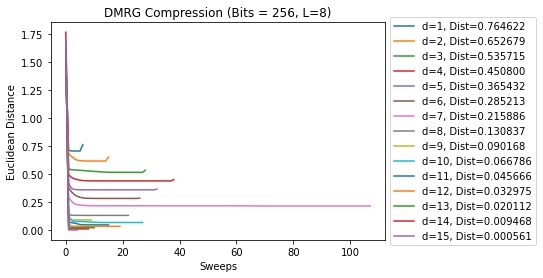

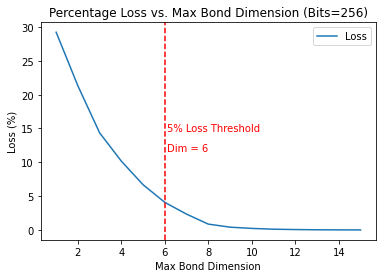

In [5]:
compressions, sim, loss = benchmark_compression(raw_state, threshold=1e-8)

In [6]:
compressed_state_unweighted, compressed_state_weighted, dist, sim = ML.compress(raw_state, bond_dim=5, threshold=1e-8, activation_function='arcsinh')

.99503719 0.75647767 0.99503719
 0.99503719 0.99503719]
[0.99503719 0.99503719 0.99503719 0.99503719 0.99503719 0.99503719
 0.99503719 0.95508311]
[0.99503719 0.99503719 0.99503719 0.99503719 0.86413559 0.99503719
 0.99503719 0.99503719]
[0.99503719 0.99503719 0.99503719 0.99503719 0.81340623 0.99503719
 0.99503719 0.99503719]
[0.99503719 0.99503719 0.99503719 0.99503719 0.80930266 0.99503719
 0.99503719 0.99503719]
[0.99503719 0.99503719 0.99503719 0.99503719 0.99503719 0.81952773
 0.99503719 0.99503719]
0.6286086524816578
[0.99503719 0.99503719 0.99503719 0.99861321]
[0.99503719 0.99503719 0.99503719 0.99503719 0.99503719 0.81953117
 0.99503719 0.99503719]
[0.99503719 0.99503719 0.99503719 0.99503719 0.80928968 0.99503719
 0.99503719 0.99503719]
[0.99503719 0.99503719 0.99503719 0.99503719 0.81339599 0.99503719
 0.99503719 0.99503719]
[0.99503719 0.99503719 0.99503719 0.99503719 0.86416842 0.99503719
 0.99503719 0.99503719]
[0.99503719 0.99503719 0.99503719 0.99503719 0.99503719 0.99

KeyboardInterrupt: 

In [ ]:
scalar_product(compressed_state_unweighted, raw_state)

In [14]:
scalar_product(compressed_state_weighted, raw_state)

0.7282693307447565

In [15]:
scalar_product(compressions[1], raw_state)

0.72245885393037

In [16]:
overlap(compressed_state_unweighted, raw_state)

0.7371983033828065

In [17]:
overlap(compressed_state_weighted, raw_state)

0.7371983033828065

In [18]:
overlap(compressions[1], raw_state)

0.7450384501079533

In [40]:
A = copy.deepcopy(compressions[1][0])

In [41]:
A = np.reshape(A, (A.shape[0]*A.shape[1]))

In [42]:
A

array([-0.69190512, -0.72198844, -0.72198844,  0.69190512])

In [53]:
z = copy.deepcopy(A[:])

for i in range(len(A)-1):
    sum_before = 0
    sum_after = 0
    for j in range(i):
        sum_before = sum_before + A[j] / (i-j)
    for j in range(i+1, len(A)-1):
        sum_after = sum_after + A[j] / (j-i)

    z[i] = z[i] + sum_before + sum_after

In [54]:
z

array([-1.08298266, -1.41389356, -1.067941  ,  0.69190512])

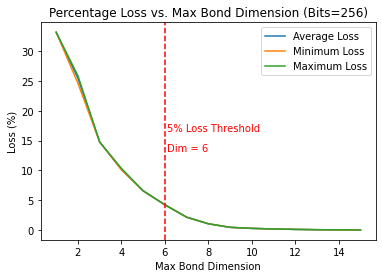

In [146]:
benchmark_compression_loss(raw_state, attempts=3)